# Statistiques descriptives sur les données socio-démographiques des quartiers des gares de RER
Cadre et hypothèses de travail

## Packages et importation des données

In [1]:
from IPython.utils import io
from io import BytesIO  

In [3]:
with io.capture_output() as captured: #on évite d'afficher les sorties lors de l'importation
    !pip install pandas fiona shapely pyproj rtree
    !pip install geopandas
    !pip install topojson
    !pip install contextily
    !pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
    !pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a
    !pip install chart_studio

In [11]:
import geopandas as gpd
import pandas as pd
import requests
from zipfile import ZipFile
import tempfile
import os
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pre_proces_Insee_IDFM import data_INSEE_stations
import cartiflette.s3 as s3
import plotly.express as px

In [5]:
with io.capture_output() as captured:
    stations_socio_RER=data_INSEE_stations()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [6]:
stations_socio_RER.shape

(254, 64)

In [12]:
#shp_communes=fond_de_carte_IDF()

## Statistiques descriptives univariées

In [13]:
stations_socio_RER.loc[:,["ind", "men", "men_pauv", "men_1ind", "men_5ind", 'men_prop', 'men_fmp', 'ind_snv',
       'men_surf', 'men_coll', 'men_mais', 'log_av45', 'log_45_70',
       'log_70_90', 'log_ap90', 'log_inc', 'log_soc', 'ind_0_3', 'ind_4_5',
       'ind_6_10', 'ind_11_17', 'ind_18_24', 'ind_25_39', 'ind_40_54',
       'ind_55_64', 'ind_65_79', 'ind_80p']].describe()

,ind,men,men_pauv,men_1ind,men_5ind,men_prop,men_fmp,ind_snv,men_surf,men_coll,men_mais,log_av45,log_45_70,log_70_90,log_ap90,log_inc,log_soc,ind_0_3,ind_4_5,ind_6_10,ind_11_17,ind_18_24,ind_25_39,ind_40_54,ind_55_64,ind_65_79,ind_80p
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02,2.540000e+02,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,6998.474409,3116.006299,455.718898,1284.334252,251.946850,1286.104331,348.591339,2.092505e+08,2.058837e+05,2656.674016,459.332283,1203.122441,562.252756,499.670079,842.778740,8.182283,679.196063,362.677165,182.087795,440.426378,576.650000,518.231102,1678.572047,1409.442913,765.328740,745.136614,303.171654
std,6605.565434,3309.504344,546.535479,1685.861653,234.068278,1228.452054,312.580898,2.474878e+08,2.004152e+05,3313.565199,369.198479,2380.707548,702.899208,520.068494,826.976612,18.439937,887.134089,312.927241,151.309812,364.782054,494.045407,464.409395,1827.656406,1338.460329,741.193784,804.797017,355.447127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2264.250000,959.775000,84.500000,313.575000,86.150000,477.250000,119.575000,5.897614e+07,7.671025e+04,555.175000,137.225000,70.150000,64.500000,145.250000,238.525000,1.000000,109.750000,111.500000,56.775000,159.150000,209.050000,189.250000,452.750000,461.675000,242.000000,241.825000,91.175000
50%,5825.250000,2384.000000,270.450000,798.500000,203.500000,976.500000,279.000000,1.411591e+08,1.615635e+05,1703.500000,402.950000,337.550000,334.100000,339.500000,610.000000,2.100000,332.500000,319.450000,160.000000,395.750000,498.300000,434.400000,1344.000000,1162.050000,604.000000,530.000000,190.550000
75%,8830.000000,3758.250000,634.725000,1541.000000,349.000000,1606.000000,459.500000,2.415691e+08,2.453625e+05,3351.000000,687.500000,1020.975000,851.250000,698.025000,1156.500000,6.750000,920.000000,506.175000,256.475000,600.875000,749.850000,670.200000,2109.000000,1781.625000,976.525000,874.000000,356.000000
max,35842.500000,19389.000000,2735.000000,10430.000000,1663.000000,7360.000000,1648.000000,1.495966e+09,1.247443e+06,19313.000000,1614.000000,12692.000000,5309.000000,3158.000000,4436.000000,167.000000,6492.000000,1932.500000,783.500000,2097.500000,2850.500000,2634.000000,12049.000000,6872.000000,3851.000000,4452.000000,2229.000000


Text(0, 0.5, 'Fréquence')

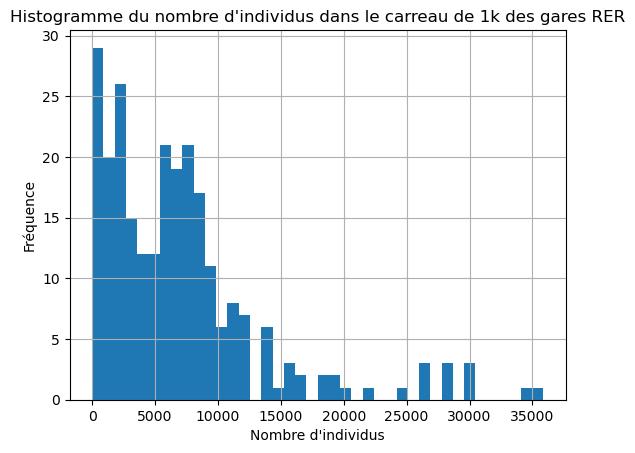

In [14]:
stations_socio_RER["ind"].hist(bins=40)
plt.title("Histogramme du nombre d'individus dans le carreau de 1k des gares RER")
plt.xlabel("Nombre d'individus")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

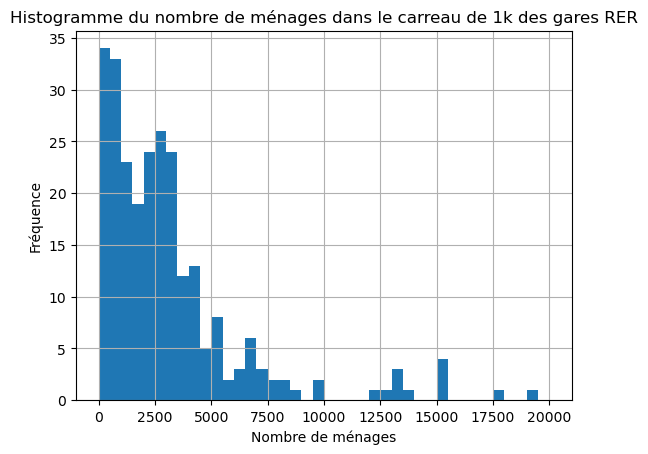

In [15]:
stations_socio_RER["men"].hist(bins=40, range=(0,20000))
plt.title("Histogramme du nombre de ménages dans le carreau de 1k des gares RER")
plt.xlabel("Nombre de ménages")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

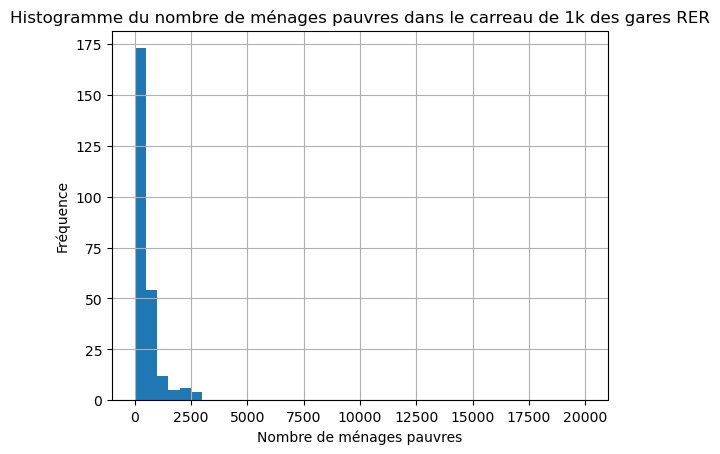

In [16]:
stations_socio_RER["men_pauv"].hist(bins=40, range=(0,20000))
plt.title("Histogramme du nombre de ménages pauvres dans le carreau de 1k des gares RER")
plt.xlabel("Nombre de ménages pauvres")
plt.ylabel("Fréquence")

Text(0, 0.5, 'Fréquence')

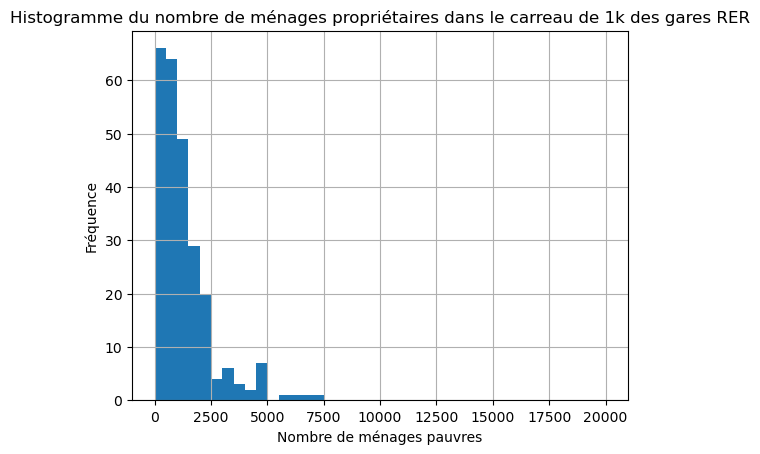

In [18]:
stations_socio_RER["men_prop"].hist(bins=40, range=(0,20000))
plt.title("Histogramme du nombre de ménages propriétaires dans le carreau de 1k des gares RER")
plt.xlabel("Nombre de ménages pauvres")
plt.ylabel("Fréquence")

Faire les autres graphs...